<a href="https://colab.research.google.com/github/Beyoojn/predictclickads/blob/main/advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Clicked Ads Customer Classification

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## About Dataset

1. Unnamed: 0 =	ID of Customers

2. Daily Time Spent on Site =	Time spent by the user on a site in minutes

3. Age = Customer's age in terms of years

4. Area Income =	Average income of geographical area of consumer

5. Daily Internet Usage =	Average minutes in a day consumer is on the internet

6. Male =	Gender of the customer

7. Timestamp =	Time at which user clicked on an Ad or the closed window

8. Clicked on Ad =	Whether or not the customer clicked on an Ad	(Target Variable)

9. city =	City of the consumer

10. province =	Province of the consumer

11. category =	Category of the advertisement

## Mount Gdrive

In [ ]:
# Import the library to mount Google Drive
from google.colab import drive
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Dataset Overview

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clicked Ads Dataset.csv')
# df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Data Preparation

### Data Cleaning

Data cleaning involves identifying incomplete values in the table. Use the count() function to clean up your data. The count() function determines the number of values in each column. If a column contains null, the columns are not identical.

#### 1. Missing Values

In [ ]:
# Checking any missing values in every column
df.isnull().sum()

,0
Unnamed: 0,0
Daily Time Spent on Site,13
Age,0
Area Income,13
Daily Internet Usage,11
Male,3
Timestamp,0
Clicked on Ad,0
city,0
province,0


In [ ]:
# Drop nan values in every column
df = df.dropna()
df.isnull().sum()

,0
Unnamed: 0,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Male,0
Timestamp,0
Clicked on Ad,0
city,0
province,0


### Duplicated Data

In [ ]:
# Checking any duplicated data in every column
df.duplicated().any()

False

#### 3. Change Data Type

In [ ]:
# Change data type "Timestamp" to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Make new column from "Tiemstamp" to get the hour data
df['hour'] = df['Timestamp'].dt.hour

# Make new column from "Timestamp" to get the month data
df['month'] = df['Timestamp'].dt.month

# Make new column from "Timestamp" to get better formating
df['timestamp'] = df['Timestamp'].dt.strftime('%m/%d/%Y')

### 4. Change Column Name

In [ ]:
# Renaming "Unnamed: 0 " column
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [ ]:
# Renaming "Male" column
df.rename(columns={'Male':'Gender'}, inplace=True)

### 5. Descriptive Statistics

In [ ]:
# Creating list of numerical and categorical columns
nums = [col for col in df.columns if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col != 'ID' ]
cats = [col for col in df.columns if df[col].dtype == 'object']

In [1]:
# Descriptive stats for numerical features
df[nums].describe()

NameError: name 'df' is not defined

In [3]:
# Descriptive stats for categorical features
df[cats].describe()

NameError: name 'df' is not defined

In [ ]:
result = []
for col in df.columns:
    result.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,ID,int64,0,0.0,963,"[0, 1, 2, 3, 4]"
1,Daily Time Spent on Site,float64,0,0.0,872,"[68.95, 80.23, 69.47, 74.15, 68.37]"
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
3,Area Income,float64,0,0.0,963,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,0,0.0,930,"[256.09, 193.77, 236.5, 245.89, 225.58]"
5,Gender,object,0,0.0,2,"[Perempuan, Laki-Laki]"
6,Timestamp,datetime64[ns],0,0.0,960,"[2016-03-27 00:53:00, 2016-04-04 01:39:00, 201..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


## Univariate analysis

### 1. Numerical Features

<ipython-input-14-06ddf8196be1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
<ipython-input-14-06ddf8196be1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
<ipython-input-14-06ddf8196be1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
<

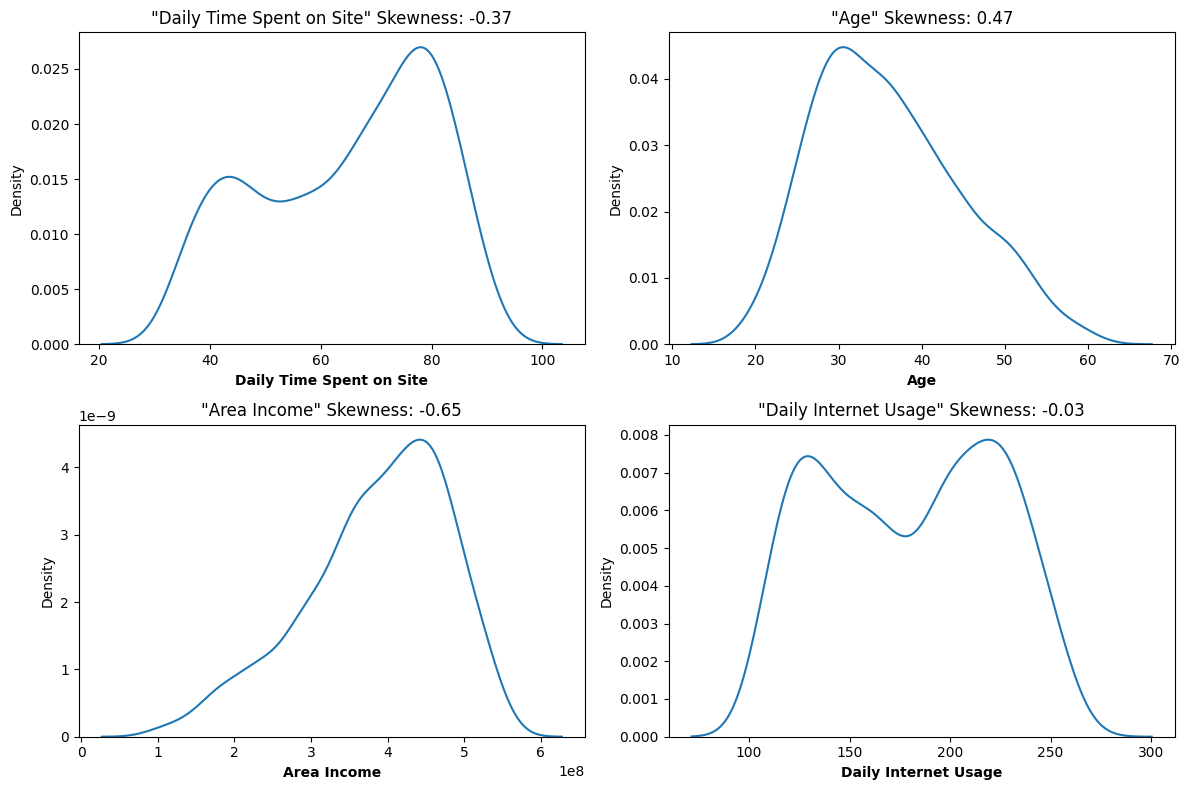

In [ ]:
skewness = df[nums].skew()

plt.figure(figsize = (12,8))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
    plt.tight_layout()

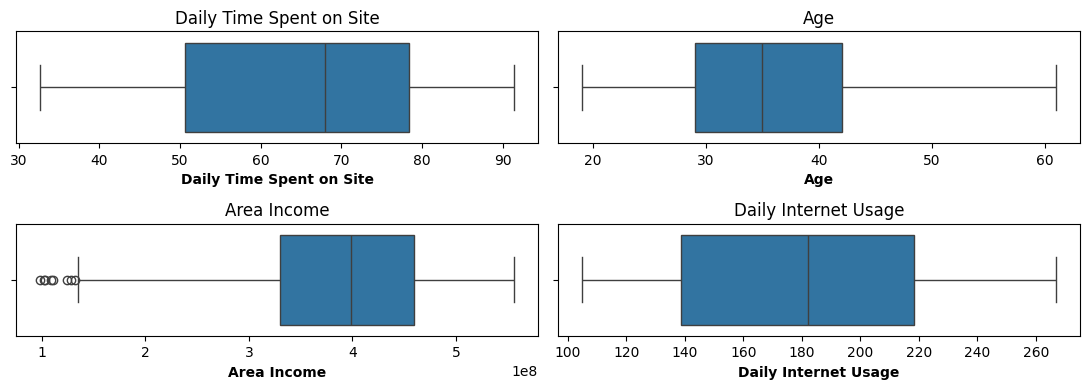

In [ ]:
plt.figure(figsize=(11, 4))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

Summary:
1. "Area Income" is the only feature with a slight skew (left-skewed).
2. "Daily Internet Usage" is nearly uniform distributed.
3. While "Age" and "Daily Time Spent on Site" is nearly normally distributed.

### 2. Categorical Features

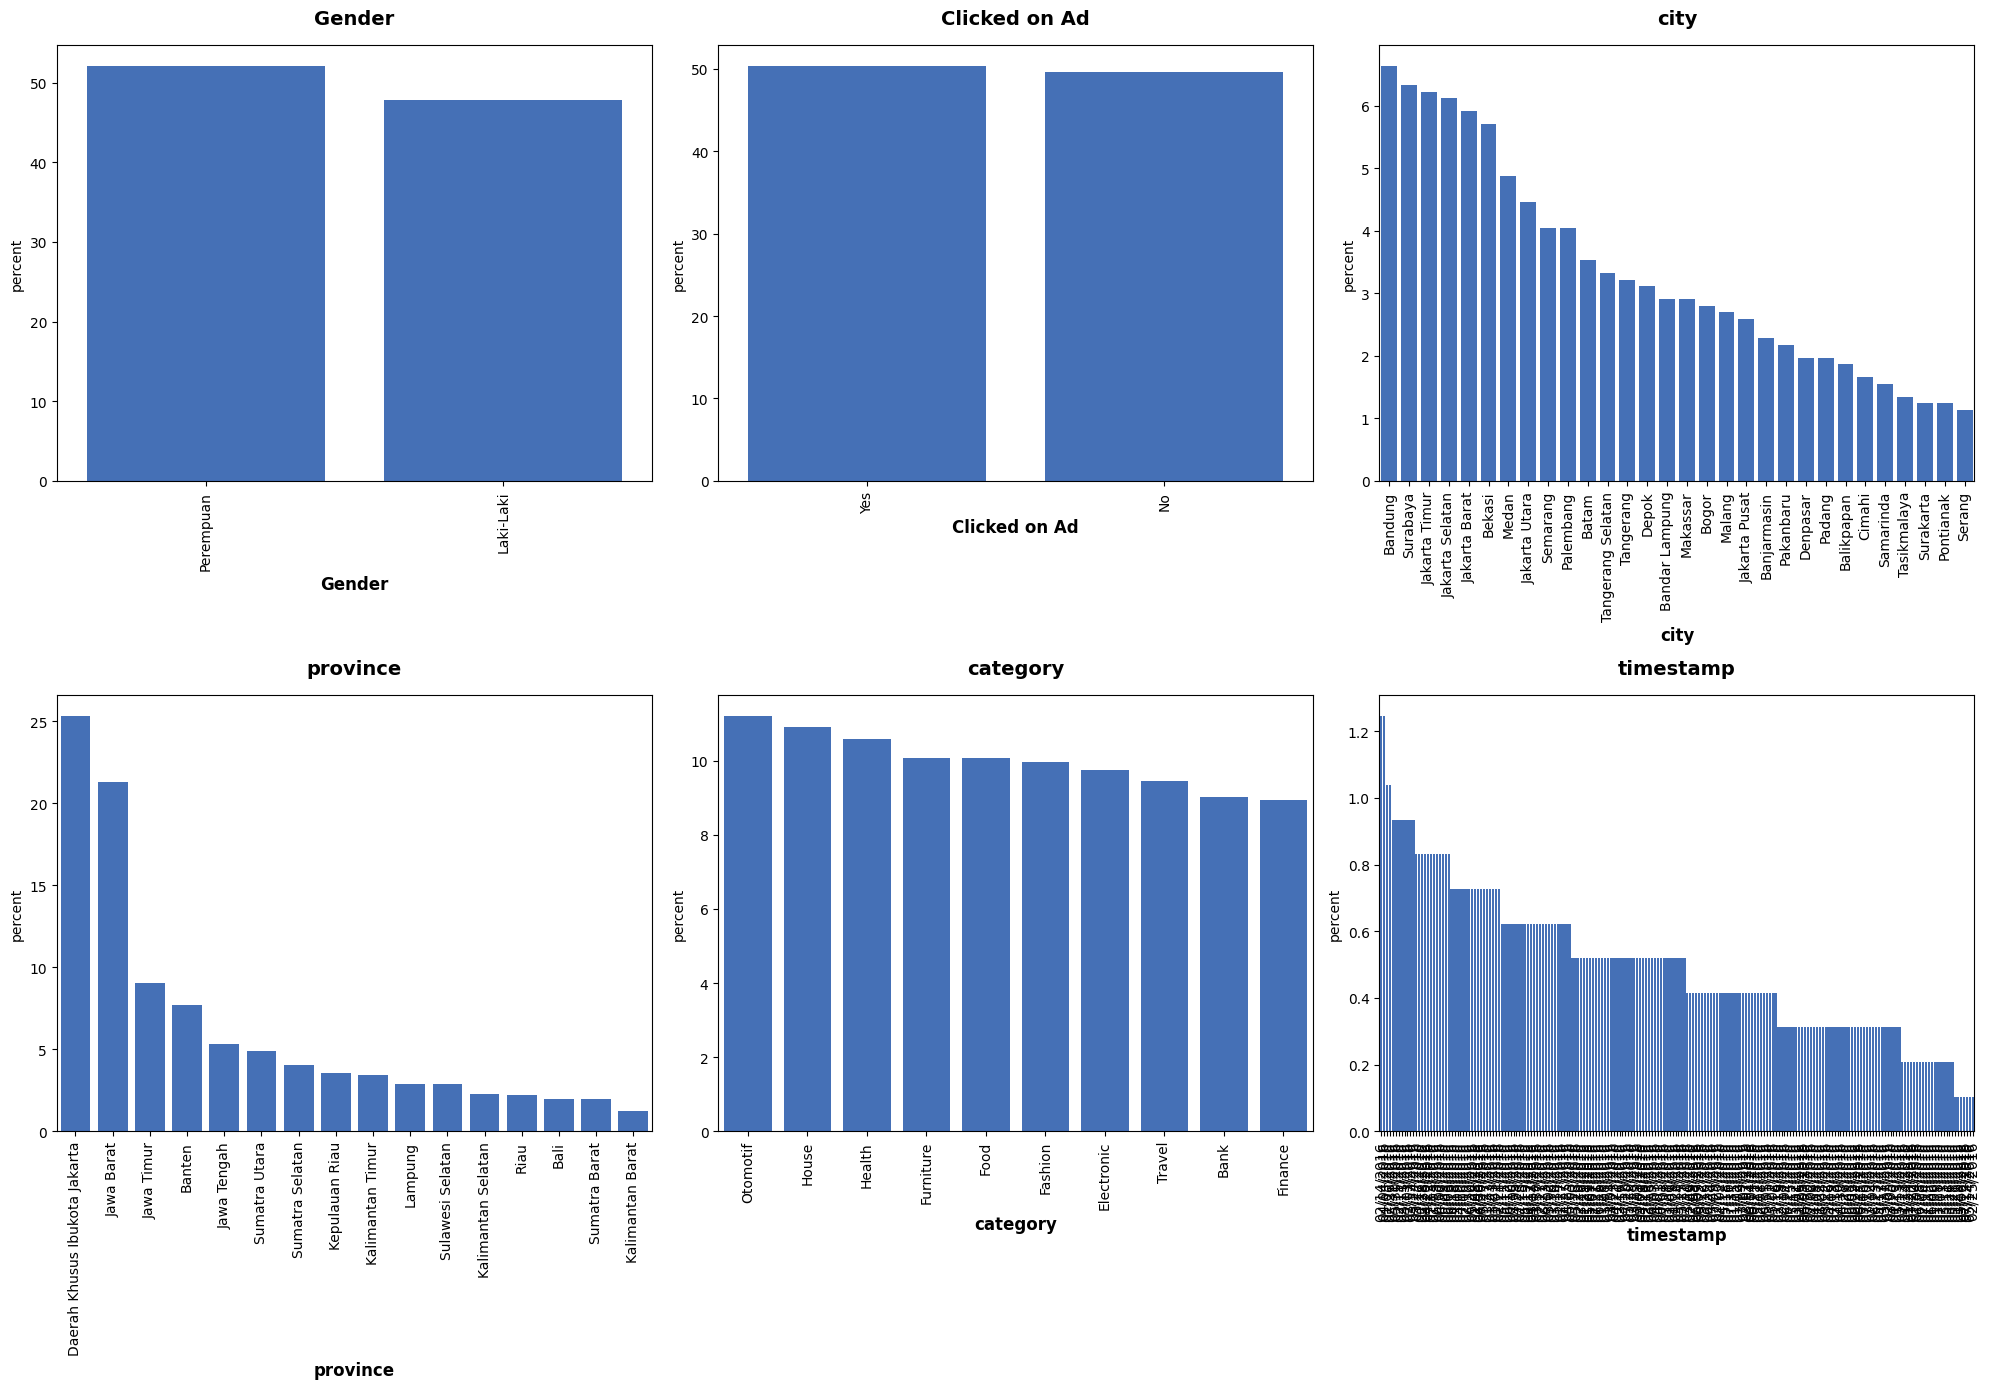

In [ ]:
plt.figure(figsize=(20,14))
for i in range(len(cats)):
    order = df[cats[i]].value_counts().index
    plt.subplot(2, 3, i+1)
    if len(df[cats[i]].unique()) > 3:
      sns.countplot(x = df[cats[i]], data = df, order=order, color = '#326cc9', stat='percent')
    else:
      sns.countplot(x = df[cats[i]], data = df, order=order, color = '#326cc9', stat='percent')
    plt.xticks(rotation=90)
    plt.xlabel(cats[i], fontsize=12, fontweight = 'bold')
    plt.title(f'{cats[i]}', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()

Summary
1. "Gender" has an almost equal distribution of male and female.
2. "Clicked on Ad" has equal distribution of No and Yes.
3. "Province" has 2 somewhat dominant values: DKI Jakarta and Jawa Barat.
4. "Category" is almost equally distributed among the all the values.

## Bivariate Analysis

### 1. Numerical Features

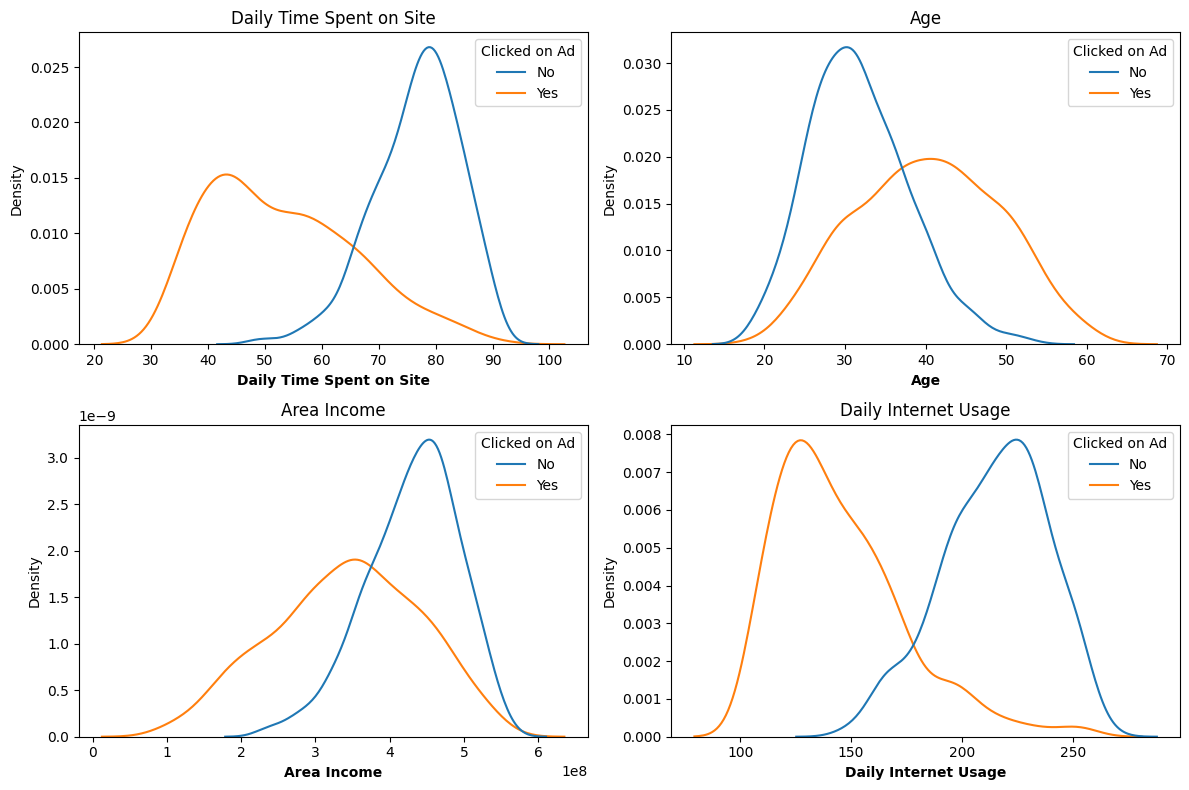

In [ ]:
plt.figure(figsize = (12,8))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=nums[i], hue='Clicked on Ad', data=df)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

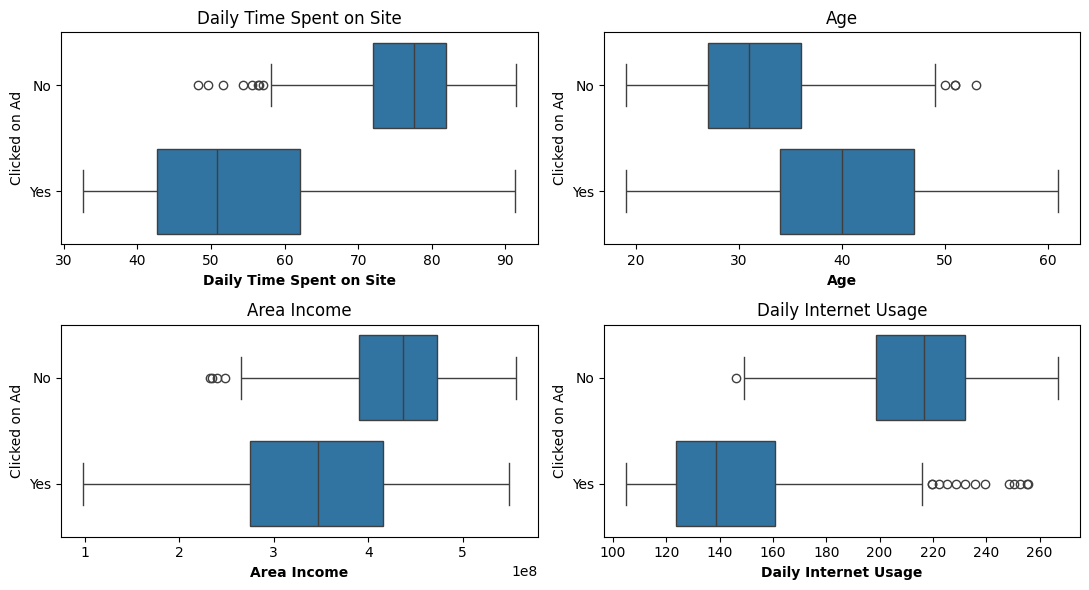

In [ ]:
plt.figure(figsize=(11, 6))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = nums[i], y='Clicked on Ad', data=df)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

Summary
1. The more time is spent on site by the customer the less likely they will click on an ad.
2. The average age of customers that clikced on an ad is 40, while the average for those that didn't is 31.
3. The average area income of customers that clicked on an ad is considerably lower than those that didn't.
4. Similar to time spent, the more the daily internet usage is, the less likely the customer will click on an ad.

### 2. Categorical Features

ValueError: num must be an integer with 1 <= num <= 4, not 5

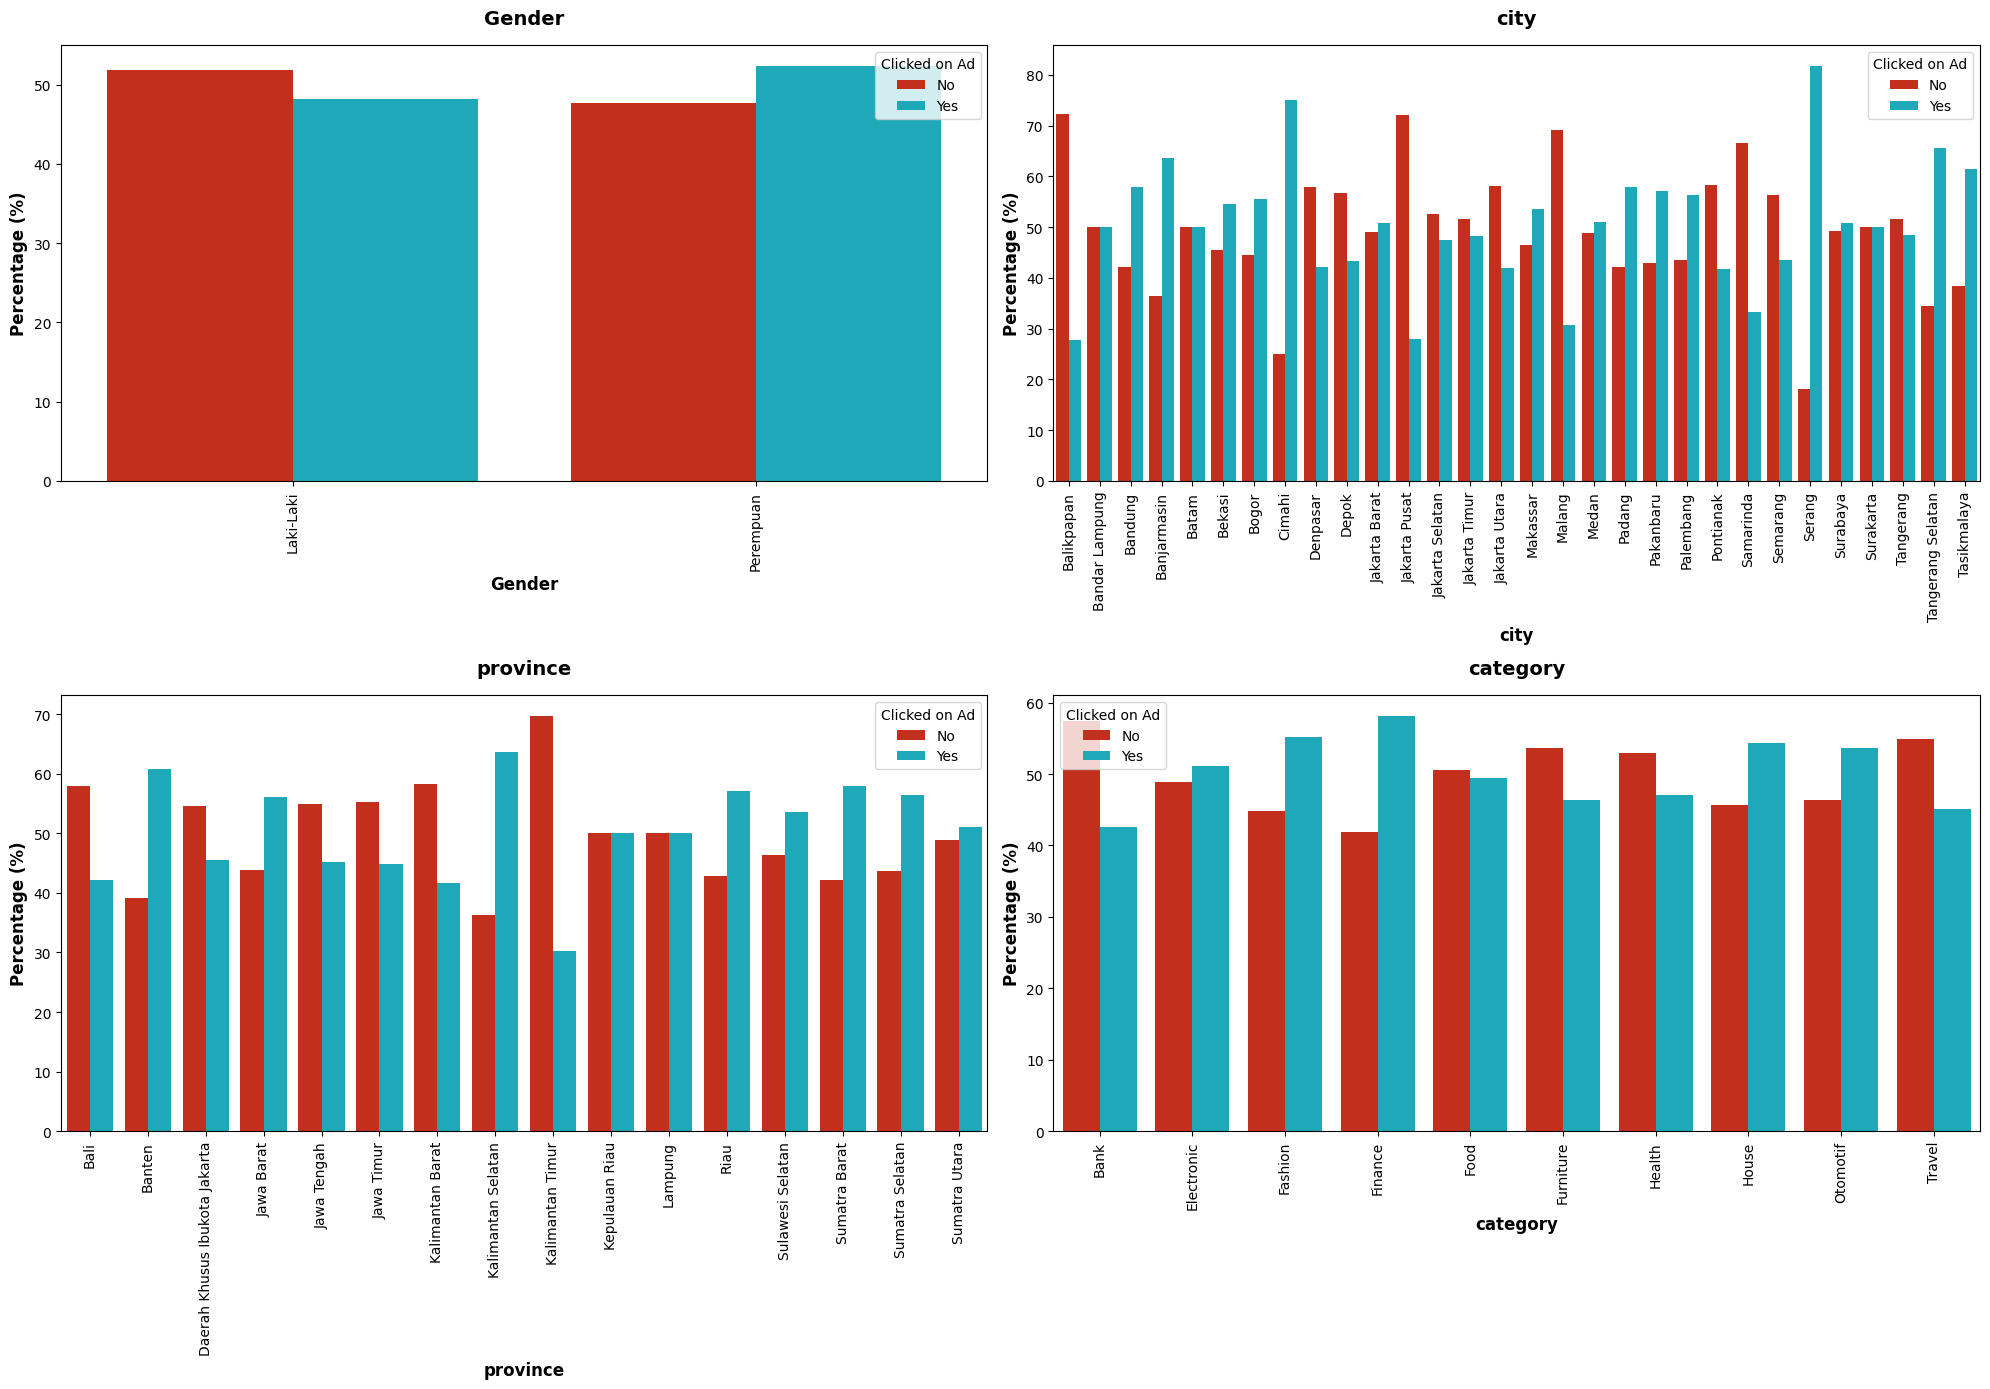

In [ ]:
cats1=cats.copy()
cats1.remove('Clicked on Ad')
df_temp = df.copy()
plt.figure(figsize=(20,14))
for i in range(len(cats1)):
    df_total = df_temp.groupby(cats1[i])['ID'].count().reset_index().rename(columns={'ID':'total'})
    df_subtotal = df_temp.groupby([cats1[i], 'Clicked on Ad'])['ID'].count().reset_index().rename(columns={'ID':'subtotal'})
    dfm = df_subtotal.merge(df_total, on=cats1[i])
    dfm['Percentage'] = round(dfm['subtotal']/dfm['total']*100, 2)

    plt.subplot(2, 2, i+1)
    sns.barplot(x = cats1[i], y='Percentage', data = dfm, palette = ['#de1a00', '#06bdd1'], hue='Clicked on Ad')
    plt.xticks(rotation=90)
    plt.xlabel(cats1[i], fontsize=12, fontweight = 'bold')
    plt.ylabel('Percentage (%)', fontsize=12, fontweight = 'bold')
    plt.title(f'{cats1[i]}', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()

Summary
1. Females clicked on an ad slightly more than males overall.
2. The city with the highest click rate is Serang with 81%, while the city with the lowest is Jakarta Pusat with 26%.
3. The top 3 provinces with the highest click rates are Kalimantan Selatan, Banten, Sumatra Barat.
4. Ad categories' click rates are pretty equal with none below 40% and none above 60%.

## Age vs. Daily Internet Usage

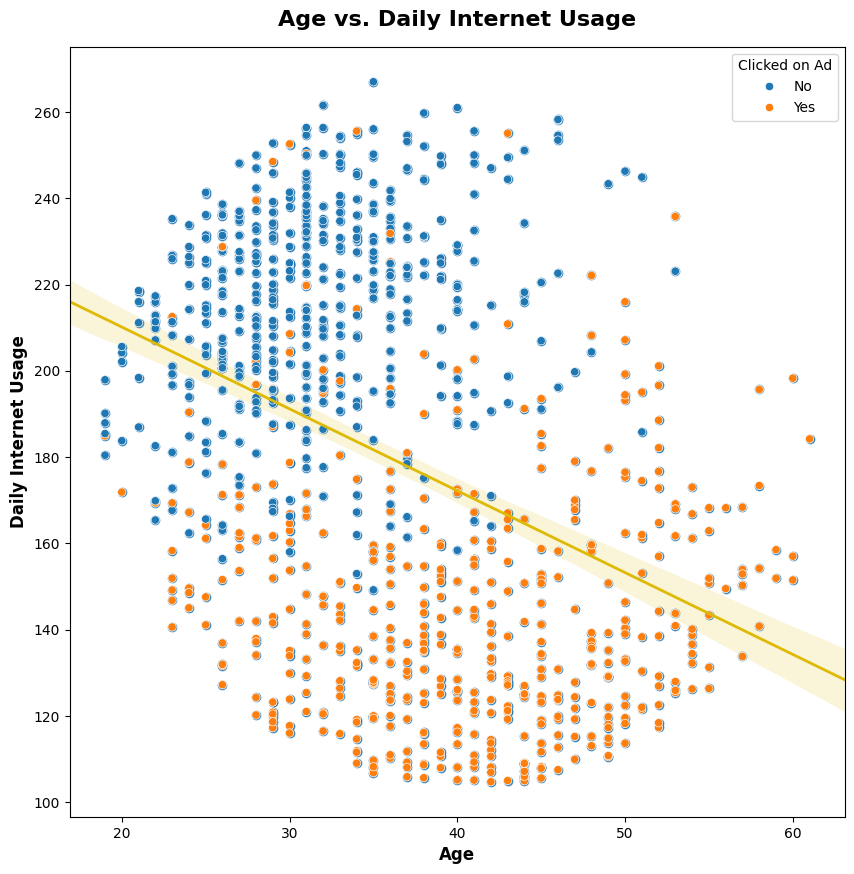

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(data=df, x="Age", y="Daily Internet Usage", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Age', y = 'Daily Internet Usage', data = df, hue='Clicked on Ad')
plt.ylabel('Daily Internet Usage', fontsize=12, fontweight = 'bold')
plt.xlabel('Age', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Daily Internet Usage', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

Summary <br>
Age is slightly negatively correlated with "Daily Internet Usage". Older customers spend less time on the internet on average compered to younger customers.

# Age vs. Daily Time Spent on Site

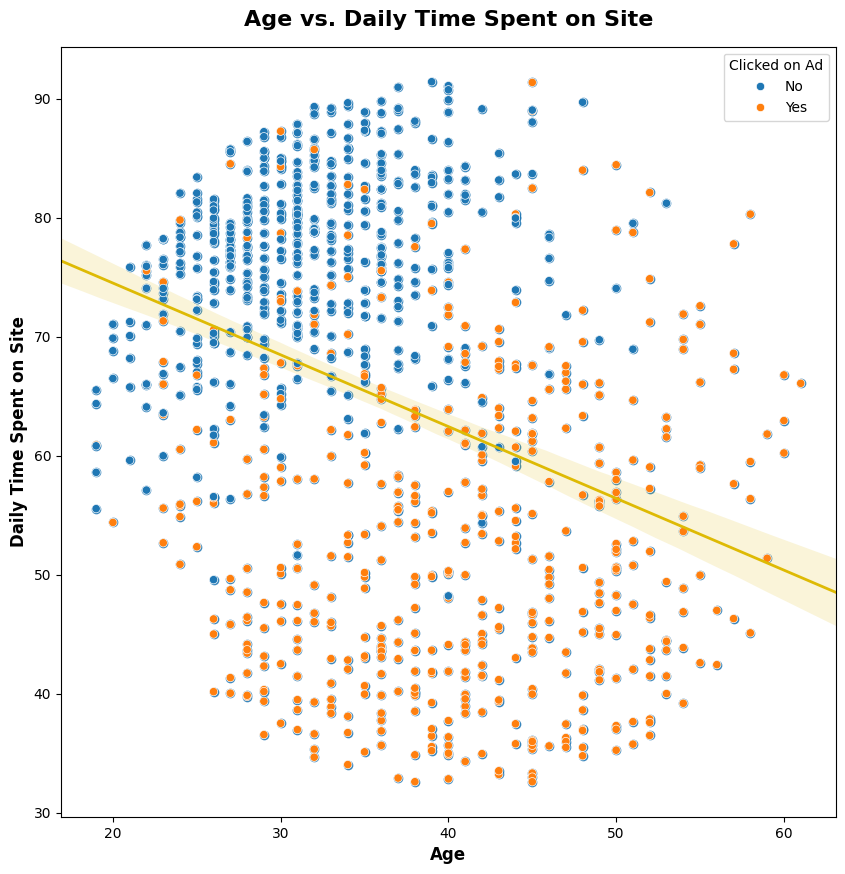

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(data=df, x="Age", y="Daily Time Spent on Site", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Age', y = 'Daily Time Spent on Site', data = df, hue='Clicked on Ad')
plt.ylabel('Daily Time Spent on Site', fontsize=12, fontweight = 'bold')
plt.xlabel('Age', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Daily Time Spent on Site', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

Summary <br>
Same as with "Daily Intert Usage, Age is slightly negatively correlated with "Daily Time Spent on Site".

# Daily Internet Usage vs. Daily Time Spent on Site

In [ ]:
set(df_clean.category)

In [ ]:
male_mapping = {'Perempuan':0,
                'Laki-Laki':1}
df_clean['male'] = df_clean['Male'].map(male_mapping)

ad_mapping = {'No':0,
              'Yes':1}
df_clean['adclicked'] = df_clean['Clicked on Ad'].map(ad_mapping)

cat_mapping = {'Bank':0,
               'Electronic':1,
               'Fashion':2,
               'Finance':3,
               'Food':4,
               'Furniture':5,
               'Health':6,
               'House':7,
               'Otomotif':8,
               'Travel':9}
df_clean['catego'] = df_clean['category'].map(cat_mapping)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Correlation on Feature')
sns.heatmap(df_clean.select_dtypes(['float', 'int']).corr(), annot=True)

# Daily Time Spent on Site Wise

In [ ]:
def pie_plot(value):
        for x in value:
                print(f"Results for grouping by {x}:")

                # Display grouped data in a table format
                grouped_data = df_clean.groupby(
                        x).agg({
                                'Daily Time Spent on Site': 'sum'}).sort_values(
                                        'Daily Time Spent on Site',
                                        ascending=False).reset_index()
                display(grouped_data)

                # Display pie chart
                plt.figure(figsize=(10, 6))
                plt.pie(grouped_data['Daily Time Spent on Site'],
                        labels=grouped_data[x],
                        autopct='%.0f%%')
                plt.title(f"Distribution of Daily Time Spent on Site by {x}")
                plt.show()

In [ ]:
def bar_plot(value, df_clean):
    for a in value:
        print(f"Results for grouping by {a}:")

        # Group the data by the specified column and aggregate
        grouped_data = df_clean.groupby(a).agg({'Daily Time Spent on Site': 'sum'}).sort_values('Daily Time Spent on Site', ascending=False).reset_index()

        # Calculate the percentage of total for each group
        total_time_spent = grouped_data['Daily Time Spent on Site'].sum()
        grouped_data['Percentage'] = (grouped_data['Daily Time Spent on Site'] / total_time_spent) * 100

        # Display the grouped data with percentages
        display(grouped_data)

        # Create the bar plot using the percentage data
        plt.figure(figsize=(15, 6))
        bar_plot = sns.barplot(x=a, y='Percentage', data=grouped_data)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set the plot title
        plt.title(f"Distribution of Daily Time Spent on Site by {a} (Percentage)")

        # Add percentage annotations on each bar
        for p in bar_plot.patches:
            percentage = f'{p.get_height():.2f}'  # Format the percentage to 2 decimal places
            bar_plot.annotate(
                percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the annotation
                ha='center',
                va='center',
                fontsize=12,
                color='black',
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points'
            )

        # Display the plot
        plt.show()

In [ ]:
bar_plot(['city'], df_clean)

In [ ]:
pie_plot(['Male'])

In [ ]:
pie_plot(['Clicked on Ad'])

In [ ]:
pie_plot(['category'])

# Details

In [ ]:
df_clean.select_dtypes(['float', 'int']).describe()

# Modeling


In [ ]:
set(df_clean.province)